# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Boujabout Sofia 75752200

Part. 2:Fotsing Donny : 51852200

Part. 3: Aarab Yassine

Part. 4: Théodore Moulaert

Part. 5: Edouard Meurant

Part. 6:


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [3]:
# Code here
import pandas as pd

beijing = pd.read_csv('BeijingPM.csv')
shanghai = pd.read_csv('ShanghaiPM.csv')
beijing['date'] = pd.to_datetime(beijing[['year', 'month', 'day', 'hour']])
shanghai['date'] = pd.to_datetime(shanghai[['year', 'month', 'day', 'hour']])

start= '2012-01-01'
end = '2015-12-31'
beijing_filtered = beijing[(beijing['date'] >= start) & (beijing['date'] <= end)]
shanghai_filtered = shanghai[(shanghai['date'] >= start) & (shanghai['date'] <= end)]

# Merge the two datasets based on year, month, day, and hour
# Adding suffixes to differentiate columns between the two cities

df = pd.merge(beijing_filtered, shanghai_filtered, on='date', suffixes=('_bj', '_sh'))

# Remove rows with missing PM2.5 data (NA) for 'PM_US Post' in both datasets
merged_data_cleaned = df.dropna(subset=['PM_US Post_bj', 'PM_US Post_sh'])



# Split the data into winter (season=4) and summer (season=2) samples
# Both cities need to have matching seasons
winter_data = merged_data_cleaned[(merged_data_cleaned['season_bj'] == 4) & (merged_data_cleaned['season_sh'] == 4)]
summer_data = merged_data_cleaned[(merged_data_cleaned['season_bj'] == 2) & (merged_data_cleaned['season_sh'] == 2)]

print(winter_data.head())


   No_bj  year_bj  month_bj  day_bj  hour_bj  season_bj  PM_Dongsi  \
0  17521     2012         1       1        0          4        NaN   
1  17522     2012         1       1        1          4        NaN   
2  17523     2012         1       1        2          4        NaN   
3  17524     2012         1       1        3          4        NaN   
4  17525     2012         1       1        4          4        NaN   

   PM_Dongsihuan  PM_Nongzhanguan  PM_US Post_bj  ...  PM_US Post_sh  \
0            NaN              NaN          303.0  ...          112.0   
1            NaN              NaN          215.0  ...          113.0   
2            NaN              NaN          222.0  ...          115.0   
3            NaN              NaN           85.0  ...          144.0   
4            NaN              NaN           38.0  ...          152.0   

   PM_Xuhui  DEWP_sh  HUMI_sh PRES_sh  TEMP_sh  cbwd_sh  Iws_sh  \
0       NaN      0.0    75.14  1028.1      4.0       SW     2.0   
1       NaN 

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [4]:
import pandas as pd

from IPython.display import display

def quantile_25(x):
    return x.quantile(0.25)

def quantile_75(x):
    return x.quantile(0.75)

# Calcul des statistiques pour Beijing et Shanghai pendant l'hiver
stats_winter_bj = winter_data['PM_US Post_bj'].agg(['mean', 'var', 'median', quantile_25, quantile_75]).rename(index={'<lambda_0>': '25%', '<lambda_1>': '75%'})
stats_winter_sh = winter_data['PM_US Post_sh'].agg(['mean', 'var', 'median', quantile_25, quantile_75]).rename(index={'<lambda_0>': '25%', '<lambda_1>': '75%'})
# agg(['mean', 'var', 'median']) : Cette partie demande à pandas de calculer la moyenne, la variance et la médiane pour la colonne PM_US Post_bj
# Calcul des statistiques pour Beijing et Shanghai pendant l'été
stats_summer_bj = summer_data['PM_US Post_bj'].agg(['mean', 'var', 'median', quantile_25, quantile_75]).rename(index={'<lambda_0>': '25%', '<lambda_1>': '75%'})
stats_summer_sh = summer_data['PM_US Post_sh'].agg(['mean', 'var', 'median', quantile_25, quantile_75]).rename(index={'<lambda_0>': '25%', '<lambda_1>': '75%'})

# Créer une table propre avec les résultats
result = pd.DataFrame({
    'Winter Beijing': stats_winter_bj,
    'Winter Shanghai': stats_winter_sh,
    'Summer Beijing': stats_summer_bj,
    'Summer Shanghai': stats_summer_sh
})

display(result)

,Winter Beijing,Winter Shanghai,Summer Beijing,Summer Shanghai
mean,122.543220,76.104722,71.840843,33.891807
var,15625.820023,3301.584019,2978.227347,611.481485
median,82.000000,59.000000,59.000000,29.000000
quantile_25,21.000000,36.000000,30.000000,16.000000
quantile_75,181.000000,99.000000,100.000000,46.000000


Comments here:

* en hiver il y a plus de pollution 
* On voit qu'en hiver il y a une grande variance ce qui fait sense puisque une grande variance signifie qu'il y a une forte dispersion ou une grande variabilité dans les données autour de la moyenne. Cela peut être dû à des pics de pollution importants. (du au chauffage/rechauffement)



-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



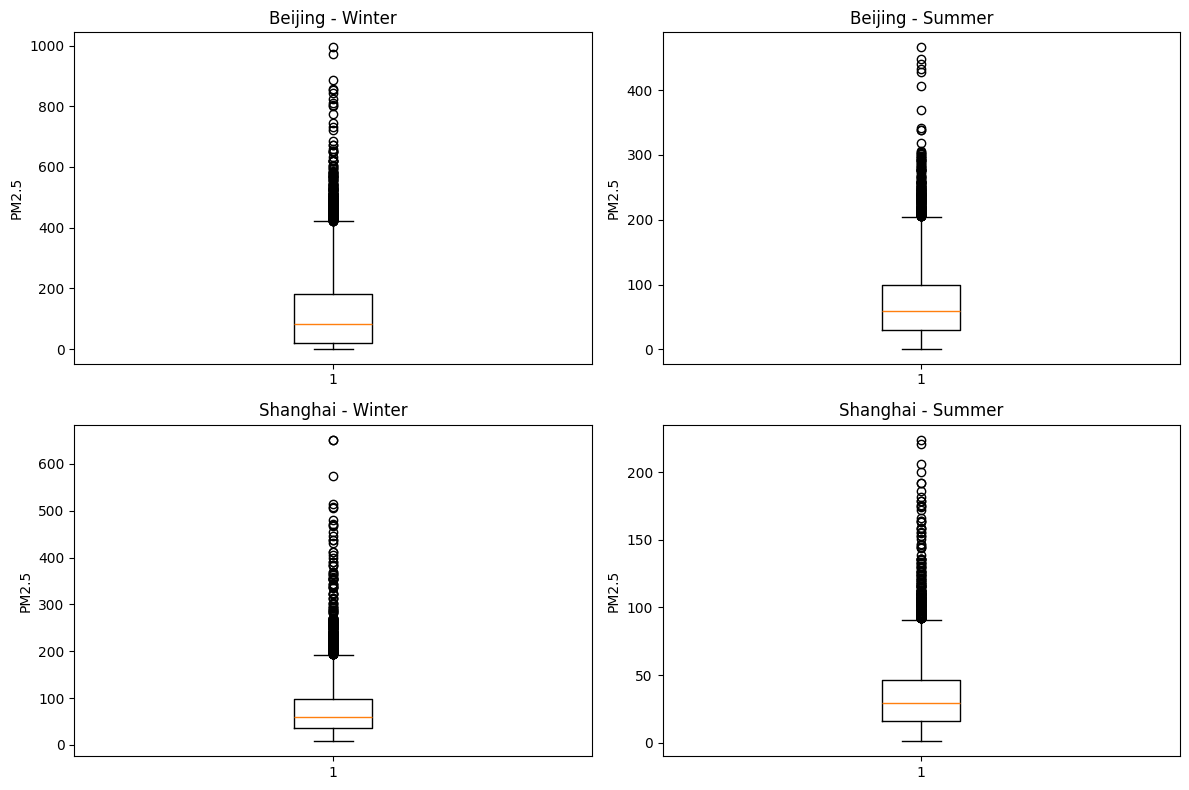

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

# Box plot pour Beijing en hiver
plt.subplot(2, 2, 1)
plt.boxplot(winter_data['PM_US Post_bj'].dropna())
plt.title('Beijing - Winter')
plt.ylabel('PM2.5')

# Box plot pour Beijing en été
plt.subplot(2, 2, 2)
plt.boxplot(summer_data['PM_US Post_bj'].dropna())
plt.title('Beijing - Summer')
plt.ylabel('PM2.5')

# Box plot pour Shanghai en hiver
plt.subplot(2, 2, 3)
plt.boxplot(winter_data['PM_US Post_sh'].dropna())
plt.title('Shanghai - Winter')
plt.ylabel('PM2.5')

# Box plot pour Shanghai en été
plt.subplot(2, 2, 4)
plt.boxplot(summer_data['PM_US Post_sh'].dropna())
plt.title('Shanghai - Summer')
plt.ylabel('PM2.5')


plt.tight_layout()


plt.show()



Comments here:La recommandation quotidienne de l'OMS pour les niveaux de PM2.5 est de 25 μg/m³.Le resultat obtenue nous montre une grande difference entre le niveaux de pollution dans les differentes villes,avec un niveau de pollution plus élévé en hiver.Celà pourrait être dû aux facteurs meteorologique et l'utilisation du chauffage.On remarque egalement que le niveau de polluttion à Beinjing est plus grande que le niveau de pollution à Shanghai.


## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [6]:

import numpy as np
from scipy import stats



# Fonction pour fitter une distribution Gamma et calculer les paramètres et la log-vraisemblance
def fit_gamma_distribution(data):
    # Ajuster la distribution Gamma (MLE)
    params = stats.gamma.fit(data, floc=0)  # Forcer loc=0 (floc=0)
    
    # Estimer les parametres
    alpha, loc, beta = params
    
    # Calculer la log-vraisemblance
    log_likelihood = np.sum(stats.gamma.logpdf(data, alpha, loc=0, scale=beta))
    
    return alpha, beta, log_likelihood


params_winter_bj = fit_gamma_distribution(winter_data['PM_US Post_bj'])
params_summer_bj = fit_gamma_distribution(summer_data['PM_US Post_bj'])
params_winter_sh = fit_gamma_distribution(winter_data['PM_US Post_sh'])
params_summer_sh = fit_gamma_distribution(summer_data['PM_US Post_sh'])


results = pd.DataFrame({
    'Location': ['Beijing - Winter', 'Beijing - Summer', 'Shanghai - Winter', 'Shanghai - Summer'],
    'Alpha': [params_winter_bj[0], params_summer_bj[0], params_winter_sh[0], params_summer_sh[0]],
    'Beta': [params_winter_bj[1], params_summer_bj[1], params_winter_sh[1], params_summer_sh[1]],
    'Log-Likelihood': [params_winter_bj[2], params_summer_bj[2], params_winter_sh[2], params_summer_sh[2]]
})



display(results)

,Location,Alpha,Beta,Log-Likelihood
0,Beijing - Winter,0.939462,130.439766,-47967.224753
1,Beijing - Summer,1.700798,42.239487,-43175.928971
2,Shanghai - Winter,2.251203,33.806240,-42788.443212
3,Shanghai - Summer,1.758744,19.270458,-36870.989338


b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

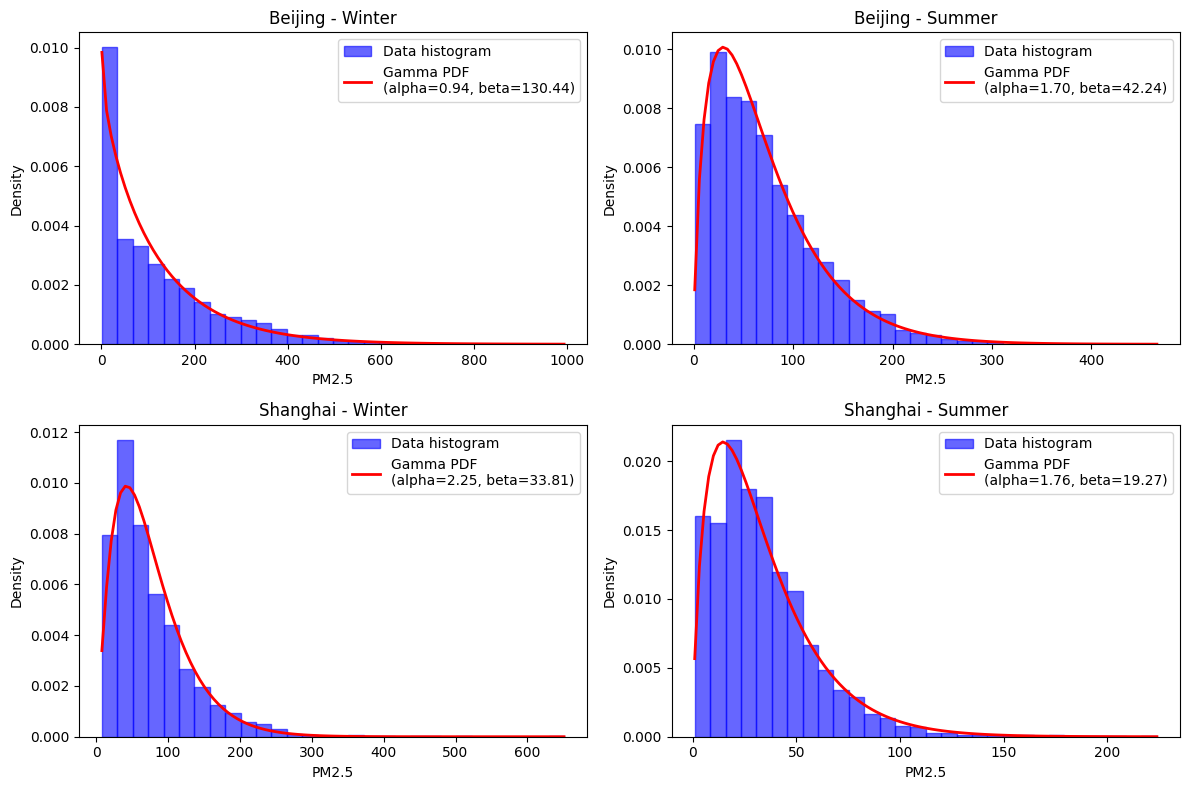

In [7]:
# Fonction pour tracer un histogramme et superposer la PDF ajustée de la distribution Gamma
def plot_histogram_with_gamma(data, alpha, beta, title):
    # Tracer l'histogramme normalisé
    # bins = 30 : 30 intervals égaux
    # density=True : histogram normalisé
    # alpha = opacité
    plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor = "blue", label="Data histogram")
    
    # Créer une plage de valeurs pour tracer la fonction de densité (PDF)
    x = np.linspace(min(data), max(data), 100)
    
    # Tracer la PDF ajustée de la distribution Gamma
    plt.plot(x, stats.gamma.pdf(x, alpha, loc=0, scale=beta), 'r-', lw=2, label=f'Gamma PDF\n(alpha={alpha:.2f}, beta={beta:.2f})')
    
    
    plt.title(title)
    plt.xlabel('PM2.5')
    plt.ylabel('Density')
    plt.legend()

plt.figure(figsize=(12, 8))

# Beijing - Hiver
plt.subplot(2, 2, 1)
plot_histogram_with_gamma(winter_data['PM_US Post_bj'], 
                          params_winter_bj[0], params_winter_bj[1], 
                          "Beijing - Winter")

# Beijing - Été
plt.subplot(2, 2, 2)
plot_histogram_with_gamma(summer_data['PM_US Post_bj'], 
                          params_summer_bj[0], params_summer_bj[1], 
                          "Beijing - Summer")

# Shanghai - Hiver
plt.subplot(2, 2, 3)
plot_histogram_with_gamma(winter_data['PM_US Post_sh'], 
                          params_winter_sh[0], params_winter_sh[1], 
                          "Shanghai - Winter")

# Shanghai - Été
plt.subplot(2, 2, 4)
plot_histogram_with_gamma(summer_data['PM_US Post_sh'], 
                          params_summer_sh[0], params_summer_sh[1], 
                          "Shanghai - Summer")


plt.tight_layout()
plt.show()


Comments here: the quality of the gamma distribution estimation is seems reasonable for modeling PM2.5 levels, especially for the central range of values in each season and location. The gamma PDF captures the general shape , which indicates that it is an appropriate choice for this context.However, there are some limitations, particularly in the tail regions where extreme PM2.5 values are observed. In these areas, the gamma fit does not fully capture the higher PM2.5 emissions, especially in Beijing during winter. This suggests that while the gamma distribution is a good approximation for typical pollution levels, it might be less accurate during peak pollution events.so the estimation quality is satisfactory for general analysis, but may require further adjustments if a more precise fit for extreme values is necessary.


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [8]:
# Fonction pour calculer la moyenne, l'écart-type et les percentiles pour une distribution Gamma
def gamma_statistics(alpha, beta):
    # Calcul de la moyenne et de l'écart-type
    mean = alpha * beta
    std_dev = np.sqrt(alpha) * beta
    
    # Calcul des percentiles 25%, 50% (médiane), et 75%
    quantile_25 = stats.gamma.ppf(0.25, alpha, loc=0, scale=beta)
    quantile_50 = stats.gamma.ppf(0.50, alpha, loc=0, scale=beta)  # Médiane
    quantile_75 = stats.gamma.ppf(0.75, alpha, loc=0, scale=beta)
    
    return mean, std_dev, quantile_25, quantile_50, quantile_75

# Calcul des statistiques pour chaque distribution gamma ajustée
# Hiver et été à Pékin et Shanghai
gamma_stats_winter_bj = gamma_statistics(params_winter_bj[0], params_winter_bj[1])
gamma_stats_summer_bj = gamma_statistics(params_summer_bj[0], params_summer_bj[1])
gamma_stats_winter_sh = gamma_statistics(params_winter_sh[0], params_winter_sh[1])
gamma_stats_summer_sh = gamma_statistics(params_summer_sh[0], params_summer_sh[1])

# Affichage des résultats
gamma_results = pd.DataFrame({
    'Location': ['Beijing - Winter', 'Beijing - Summer', 'Shanghai - Winter', 'Shanghai - Summer'],
    'Mean': [gamma_stats_winter_bj[0], gamma_stats_summer_bj[0], gamma_stats_winter_sh[0], gamma_stats_summer_sh[0]],
    'Std Dev': [gamma_stats_winter_bj[1], gamma_stats_summer_bj[1], gamma_stats_winter_sh[1], gamma_stats_summer_sh[1]],
    '25%': [gamma_stats_winter_bj[2], gamma_stats_summer_bj[2], gamma_stats_winter_sh[2], gamma_stats_summer_sh[2]],
    '50% (Median)': [gamma_stats_winter_bj[3], gamma_stats_summer_bj[3], gamma_stats_winter_sh[3], gamma_stats_summer_sh[3]],
    '75%': [gamma_stats_winter_bj[4], gamma_stats_summer_bj[4], gamma_stats_winter_sh[4], gamma_stats_summer_sh[4]]
})

print("test")

display(gamma_results)
display(result)


test


,Location,Mean,Std Dev,25%,50% (Median),75%
0,Beijing - Winter,122.543220,126.429858,33.013707,82.788035,169.890260
1,Beijing - Summer,71.840843,55.086481,31.494866,58.356072,97.712423
2,Shanghai - Winter,76.104722,50.722919,38.813502,65.180934,101.624380
3,Shanghai - Summer,33.891807,25.556030,15.160290,27.729424,46.005220


,Winter Beijing,Winter Shanghai,Summer Beijing,Summer Shanghai
mean,122.543220,76.104722,71.840843,33.891807
var,15625.820023,3301.584019,2978.227347,611.481485
median,82.000000,59.000000,59.000000,29.000000
quantile_25,21.000000,36.000000,30.000000,16.000000
quantile_75,181.000000,99.000000,100.000000,46.000000


Comments here:
The Gamma distribution provides a good fit for the central tendencies (mean and median) of PM2.5 emissions in both cities during winter and summer. However, there are discrepancies in capturing the full spread, particularly in the lower and upper tails, as seen in the variance and quantiles. The empirical distributions show slightly heavier tails, indicating more variability in the actual data compared to the Gamma model. Overall, the fit is satisfactory for general trends but may miss some nuances in the data's extremes.


------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

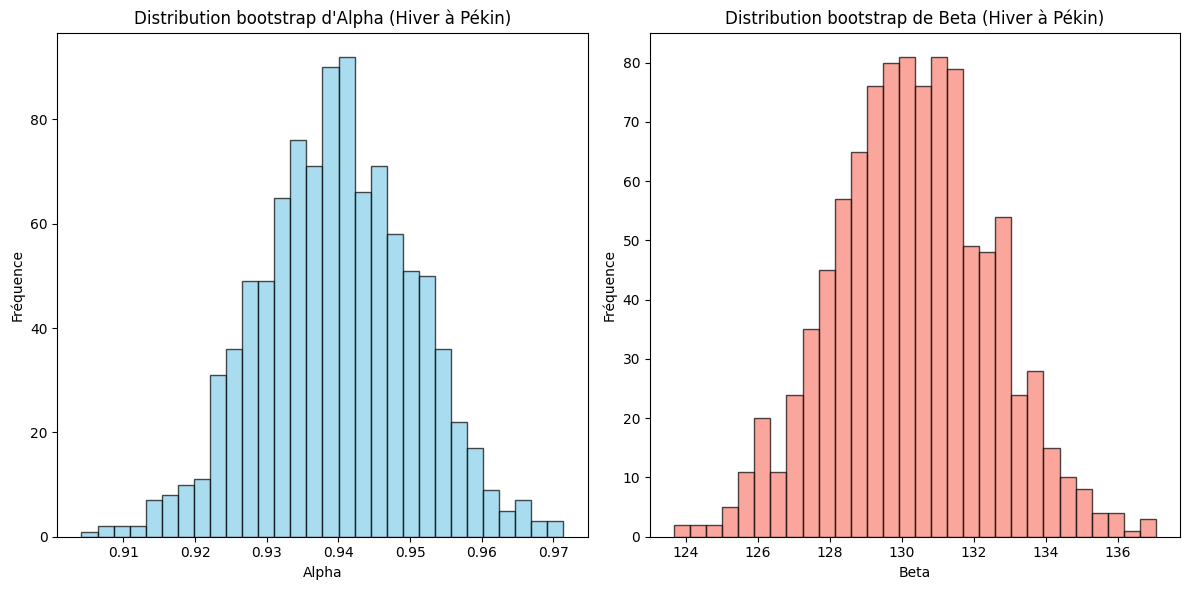

Intervalle de confiance à 5% pour Alpha : [0.91845727 0.96059317]
Intervalle de confiance à 5% pour Beta : [125.91606867 134.48475891]


In [9]:
#Code here
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Fonction pour ajuster une distribution Gamma et renvoyer les paramètres alpha et beta
def fit_gamma(data):
    # On ajuste la distribution Gamma à l'aide de MLE (avec loc forcé à 0)
    alpha, loc, beta = stats.gamma.fit(data, floc=0)  # On force loc=0
    return alpha, beta

# Fonction pour effectuer le bootstrap
def bootstrap_gamma(data, n_samples, sample_size):
    # Initialiser des listes pour stocker les estimations d'alpha et de beta
    alpha_estimates = []
    beta_estimates = []
    
    # Effectuer le bootstrap
    for _ in range(n_samples):
        # Tirer un échantillon avec remise à partir des données
        sample = np.random.choice(data, size=sample_size, replace=True)
        
        # Ajuster la distribution Gamma sur l'échantillon tiré
        alpha, beta = fit_gamma(sample)
        
        # Stocker les zestimations
        alpha_estimates.append(alpha)
        beta_estimates.append(beta)
    
    return np.array(alpha_estimates), np.array(beta_estimates)

# On se concentre ici sur les émissions de PM2.5 à Pékin pendant l'hiver
beijing_winter_data = winter_data['PM_US Post_bj'].dropna()

# On réalise 1000 bootstraps avec des échantillons de taille 6000
n_bootstraps = 1000
sample_size = 6000
alpha_bootstrap, beta_bootstrap = bootstrap_gamma(beijing_winter_data, n_bootstraps, sample_size)

# Tracer les histogramme des paramètres alpha et beta
plt.figure(figsize=(12, 6))

# Histogramme pour les estimations de alpha
plt.subplot(1, 2, 1)
plt.hist(alpha_bootstrap, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution bootstrap d\'Alpha (Hiver à Pékin)')
plt.xlabel('Alpha')
plt.ylabel('Fréquence')

# Histogramme pour les estimations de beta
plt.subplot(1, 2, 2)
plt.hist(beta_bootstrap, bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribution bootstrap de Beta (Hiver à Pékin)')
plt.xlabel('Beta')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Calculer les intervalles de confiance à 5% pour alpha et beta
alpha_conf_interval = np.percentile(alpha_bootstrap, [2.5, 97.5])
beta_conf_interval = np.percentile(beta_bootstrap, [2.5, 97.5])

# Printt les intervalles de confiance
print(f"Intervalle de confiance à 5% pour Alpha : {alpha_conf_interval}")
print(f"Intervalle de confiance à 5% pour Beta : {beta_conf_interval}")

Comments here:
These intervals provide an estimate of the range within which the true values of 𝛼 and 𝜃 likely fall, with 95% confidence.
The relatively narrow intervals suggest that the estimated parameters are precise, indicating good accuracy of the Maximum Likelihood Estimation (MLE) for these parameters.
Given that the intervals are not too wide, we can conclude that the accuracy is relatively good. This suggests that the bootstrap samples are consistent and the MLE method is reliable for estimating the distribution parameters for PM2.5 emissions in this dataset.


## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [10]:

import pandas as pd
import statsmodels.api as sm



beijing2 = pd.read_csv('BeijingPM.csv')

# Remove lines from dataset with NaN entries 
# Filter for winter season 4 
# Select needed columns (except cbwd)

df_remove = beijing2.dropna()
df_winter = df_remove[df_remove.iloc[:,5]==4]
df_final = df_winter.iloc[:,[9,10,11,12,13,15,16]]

# Create dummy variable from the 14th column of df_winter
dummies = pd.get_dummies(df_winter.iloc[:,14],drop_first=True,dtype=int)
df_ready= pd.concat([df_final,dummies],axis=1)



# X explanatory variables : weather conditions 
# Y response variable : The PM2.5 emissions level measured by the US embassy in Beijing during winter 


Y = df_ready.iloc[:,0]
X = df_ready.iloc[:,1 :]



# Compute the coefficient using OLS 

Xm = sm.add_constant(X)
model = sm.OLS(Y,Xm).fit()


print("The coefficients are :\n", model.params)

# Computation of R2 to determine the goodness of fit 

R2= model.rsquared
print('\nThe value of R2 is :\n', R2)

# Retrive F-stat and t-stat 

f_stat = model.fvalue
f_pvalue = model.f_pvalue

t_stat = model.tvalues
p_values = model.pvalues

print("\nF Stat:", f_stat)
print("F Stat p-value:", f_pvalue)
print("\nT-stat for coefficients:\n", t_stat)
print("\nP-values for coefficients:\n", p_values)




The coefficients are :
 const            1273.447176
DEWP               -0.261978
HUMI                3.399828
PRES               -1.270291
TEMP                4.362231
Iws                -0.119133
precipitation    -264.093346
NW                 -6.266833
SE                 20.881207
cv                 36.507866
dtype: float64

The value of R2 is :
 0.4671891954320555

F Stat: 407.53519672105097
F Stat p-value: 0.0

T-stat for coefficients:
 const             5.008502
DEWP             -0.412637
HUMI             16.622963
PRES             -5.175596
TEMP              7.053196
Iws              -5.436593
precipitation    -8.844332
NW               -1.416300
SE                4.335293
cv                7.669800
dtype: float64

P-values for coefficients:
 const            5.711689e-07
DEWP             6.798937e-01
HUMI             3.885612e-60
PRES             2.378425e-07
TEMP             2.036817e-12
Iws              5.740481e-08
precipitation    1.333574e-18
NW               1.567621e-01


# Discussion about the goodness of fit 

A way to estimate the quality of a model is to determine the variance that can be explained by the model by computing R2. In our case, the value of R2 suggests that 46.7 % of the variance in the PM2.5 emission (=response variable) is captured by the model. Thus, we conclude that   53,3 % is due to errors or  uncaptured variables. As a result, the model provides predictions with moderate accuracy but not  an accurate fit because it does not capture the whole complexity of the response variable.

To determine the global dependence between the reponse variable and the explanatory variables, we compute the f-statistic along with its p-value. In this analysis, we have a high F-statistics of 407 which signifies that the independent variables introduced in the  model collectively have a strong relationship with the PM2.5 emission. The low p-value indicates that at least one variable have a strong impact on the response variable.

To determine the individual effect of each explanatory variables, we compute the t-statistic along with their respective p-values. We observe that the precipitation and humidity variables  have a high absolute t-value and low p-value which indicates that those variable have a  significant impact on the PM2.5 emission. Moreover, we notice that the DEWD and NW variables have a high p-values with concludes that they don't influence the response variable.

In summary, the model captures a part of the variance of the PM2.5 emission but the fit can be improved.The F-statistics detect a strong relationship between the response variable and the independant variables. The T-statistics highlight the significant independant variables.

# Impact of precipitation 

The linear regression model  provides  a linear relationship between the PM2.5 emission and a set of explanatory variables . The coefficients associated to each factor indicate their impact on  the response variable. As discussed previously, we concluded using different statistical tools that the precipitation variable has a strong impact on the response variable. The  coefficientfor precipitation is -264. This means that for every 1 mm increase in  precipitation,  the PM2.5 emission decreases by -264 µg/m^3.

------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Select the PM_US column and remove lines that are not in right time period and with unknown values 

beijing_fin= beijing_filtered.iloc[:,[9]]
beijing_final =beijing_fin.dropna()




# Split dataset into training set and validation set 

rows = len(beijing_final)
training_set = beijing_final.head(int(0.75*rows))
print("\nThe training  set is :\n",training_set)

validation_set = beijing_final.iloc[int(0.75*rows):]
print("\nThe validation set is :\n" ,validation_set)


# Create the matix X (=explanatoy variables)
# The ith row of X contains the 3 previous response variable(Yi-1,Yi-2,Yi-3)  to compute Yi

rows_train = len(training_set)
Xinit = np.zeros((rows_train,3))
for i in range(3):
    Xinit[i]=training_set.values[i]

for i in range(3,rows_train):
    for j in range(3):
        Xinit[i][j]=training_set.values[i-1-j]

# Remove the first 3 elements because negative index 

X=Xinit[3:]
Y = training_set[3:]

# Evaluate the model on the training model

Xm = sm.add_constant(X)
result = sm.OLS(Y,Xm).fit()


print("\nThe coefficients are \n", result .params)


# Computation of R2 to determine the goodness of fit 

R2= result.rsquared
print('\nThe value of R2 is :\n', R2)

# Retrive F-stat and t-stat 

f_stat = result.fvalue
f_pvalue = result.f_pvalue

t_stat = result.tvalues
p_values = result.pvalues

print("\nF Stat:", f_stat)
print("F Stat p-value:", f_pvalue)
print("\nT-stat for coefficients:\n", t_stat)
print("\nP-values for coefficients:\n", p_values)







The training  set is :
        PM_US Post
17520       303.0
17521       215.0
17522       222.0
17523        85.0
17524        38.0
...           ...
43867       102.0
43868       117.0
43869       125.0
43870       145.0
43871       157.0

[25680 rows x 1 columns]

The validation set is :
        PM_US Post
43872       163.0
43873       176.0
43874       193.0
43875       198.0
43876       214.0
...           ...
52556        20.0
52557        22.0
52558        33.0
52559        26.0
52560        28.0

[8560 rows x 1 columns]


/var/folders/yq/qtl8zmm92jq1n6rymy46d6h80000gn/T/ipykernel_28685/2066503415.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Xinit[i][j]=training_set.values[i-1-j]



The coefficients are 
 const    3.781103
x1       1.158493
x2      -0.214590
x3       0.016960
dtype: float64

The value of R2 is :
 0.9370252505208563

F Stat: 127332.77731994803
F Stat p-value: 0.0

T-stat for coefficients:
 const     17.935179
x1       185.654785
x2       -22.697060
x3         2.718837
dtype: float64

P-values for coefficients:
 const     1.712679e-71
x1        0.000000e+00
x2       6.196905e-113
x3        6.555598e-03
dtype: float64


# Discussion about the goodness of fit 
The auto-regressive model has R2 value of 93.7%, indicating that  it's an excellent model to prediction the PM2.5 emissions.The high R2 suggests that the majority of the variance can be explained by model. Moreover, the very high value of the F-staticts signifies that the PM2.5 emissions is strongly dependent of the 3 previous values of PM2.5 emissions. This observation is confirmed with the high  t-statistics for each coefficients and the  low corresponding p-values.

In summary, the simple auto-regressive model provides reliable predictions based on historical data.

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

/var/folders/yq/qtl8zmm92jq1n6rymy46d6h80000gn/T/ipykernel_28685/3157733057.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat[i]=validation_set.values[i]   # The 3 first values of y_hat are the 3 first values of the validation set (negative index)
/var/folders/yq/qtl8zmm92jq1n6rymy46d6h80000gn/T/ipykernel_28685/3157733057.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat[i]= a1*validation_set.values[i-1] + a2*validation_set.values[i-2] + a3*validation_set.values[i-3] +const


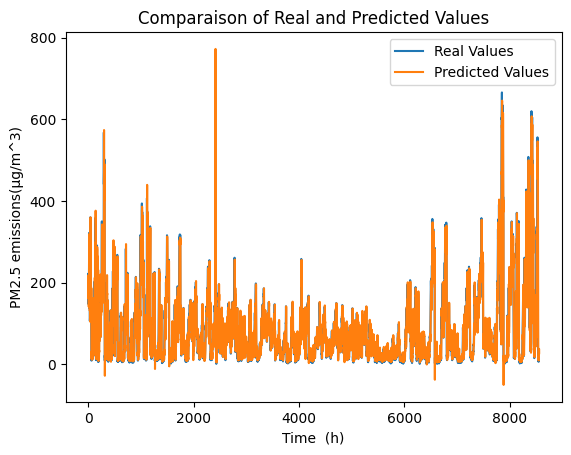

/var/folders/yq/qtl8zmm92jq1n6rymy46d6h80000gn/T/ipykernel_28685/3157733057.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_val[i] = y_hat[i]-validation_set.values[i]


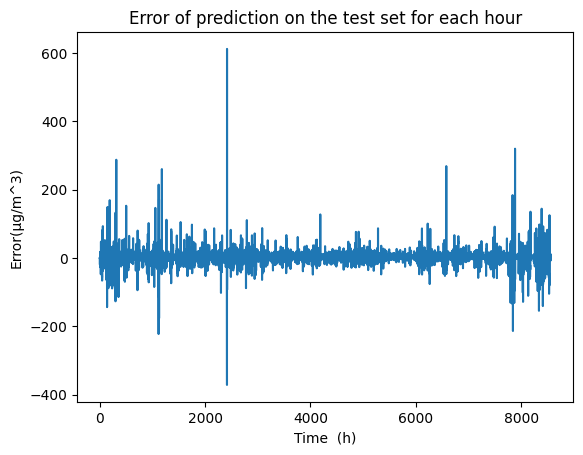

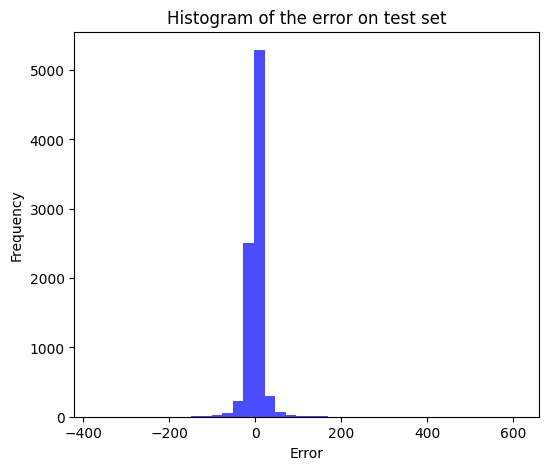

/var/folders/yq/qtl8zmm92jq1n6rymy46d6h80000gn/T/ipykernel_28685/3157733057.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat2[i]=training_set.values[i]
/var/folders/yq/qtl8zmm92jq1n6rymy46d6h80000gn/T/ipykernel_28685/3157733057.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat2[i]= a1*training_set.values[i-1] + a2*training_set.values[i-2] + a3*training_set.values[i-3] +const
/var/folders/yq/qtl8zmm92jq1n6rymy46d6h80000gn/T/ipykernel_28685/3157733057.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array befo


The MAE on the training set  is :
 12.249541835773478

The MAE on the validation set is :
 10.633215263034893


In [14]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Create a matrix containing the forecast 

coefficient = result.params
a1= coefficient['x1']
a2= coefficient['x2']
a3= coefficient['x3']
const = coefficient['const']

y_hat = np.zeros(len(validation_set))
for i in range(3):
    y_hat[i]=validation_set.values[i]   # The 3 first values of y_hat are the 3 first values of the validation set (negative index)


for i in range(3,len(validation_set)):
    y_hat[i]= a1*validation_set.values[i-1] + a2*validation_set.values[i-2] + a3*validation_set.values[i-3] +const
 


# Graph to compare forecast with real emissions 

real_values = validation_set.iloc[3:].values.flatten()
plt.plot(real_values, label='Real Values')
plt.plot(y_hat, label='Predicted Values')
plt.legend()
plt.title('Comparaison of Real and Predicted Values')
plt.xlabel('Time  (h)')
plt.ylabel('PM2.5 emissions(µg/m^3)')
plt.show()


# Plot the error of prediction on test set 

error_val = np.zeros(len(y_hat))
for i in range(len(y_hat)):
    error_val[i] = y_hat[i]-validation_set.values[i]


plt.plot(error_val)
plt.title('Error of prediction on the test set for each hour')
plt.xlabel('Time  (h)')
plt.ylabel('Error(µg/m^3)')
plt.show()  

# Plot the hisogram of the error

plt.figure(figsize=(6, 5))
plt.hist(error_val, bins=40,color='blue', alpha=0.7)
plt.title('Histogram of the error on tesr set')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


# Compute error prediction on training set 

y_hat2 = np.zeros(len(training_set))
for i in range(3):
    y_hat2[i]=training_set.values[i]   

for i in range(3,len(training_set)):
    y_hat2[i]= a1*training_set.values[i-1] + a2*training_set.values[i-2] + a3*training_set.values[i-3] +const

error_train = np.zeros(len(y_hat2))
for i in range(len(y_hat2)):
    error_train[i] = y_hat2[i]-training_set.values[i]

# Computation of the mean absolute error

MAE_val=np.mean(abs(error_val))
MAE_train = np.mean(abs(error_train))

print("\nThe MAE on the training set  is :\n" ,MAE_train)
print("\nThe MAE on the validation set is :\n" ,MAE_val)
 


# Discussion about the error of prediction 

From the difference between the actual and predicted values we generate  a histogram of the error of prediction on the test set. The histogram  allows us to visualise the error distribution showing that  most observation cluster around 0. This means that the model made accurate predicitions for a strong portion of the test set. Moreover, the absolute average mean is relativaly small compared to the average PM2.5 emissions. Hence,we  conclude that the error of prediction is acceptable.


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

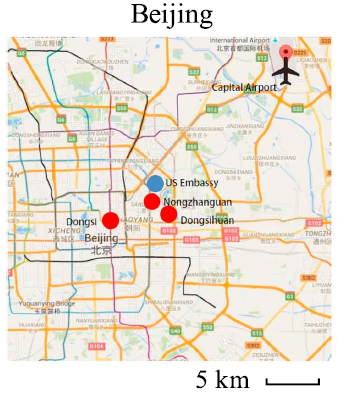


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [12]:
# Code here
beijing_data = pd.read_csv("D:\\BAC 3\\stat\\hackaton 1\\Hackaton1\\BeijingPM.csv")
beijing_data['date'] = pd.to_datetime(beijing_data[['year', 'month', 'day', 'hour']])
start_date = '2012-01-01'
end_date = '2015-12-31'
filtered_data = beijing_data[(beijing_data['date'] >= start_date) & (beijing_data['date'] <= end_date)]
winter_data = filtered_data[filtered_data['season'] == 4]
winter_data_cleaned = winter_data.dropna(subset=['PM_Nongzhanguan', 'PM_US Post'])
print("Cleaned Winter Data Sample:\n", winter_data_cleaned.head())
print("Number of observations with both PM2.5 values:\n", winter_data_cleaned[['PM_Nongzhanguan', 'PM_US Post']].count())



b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [13]:
# Code here
from scipy import stats

pm_us = winter_data_cleaned['PM_US Post']
pm_nongzhanguan = winter_data_cleaned['PM_Nongzhanguan']
t_stat, p_value = stats.ttest_rel(pm_us, pm_nongzhanguan)
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average hourly PM2.5 emissions are significantly different between the two locations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average hourly PM2.5 emissions between the two locations.")
differences = pm_us - pm_nongzhanguan
normality_test = stats.shapiro(differences)
print(f"Shapiro-Wilk Test for Normality of Differences: p-value = {normality_test.pvalue:.4f}")
if normality_test.pvalue > alpha:
    print("The differences appear to be normally distributed (p > 0.05).")
else:
    print("The differences may not be normally distributed (p <= 0.05).")


Comment here:
Since the p-value is significantly less than the 0.05 threshold, we reject the null hypothesis. This indicates a statisticaly significant difference in the average hourly PM2.5 emissions between the US embassy and Nongzhangan locations.The paired t-test assumes that the differences between the paired samples are normally distributed.
Since the test indicates non-normality (p ≤ 0.05), this assumption is violated.So not all assumptions required to perform the paired t-test are satisfied .


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:
The Wilcoxon Test is a non-parametric statistical test used to compare two related samples.Unlike the Student's t-test, which assumes that the differences between paired samples are normally distributed, the Wilcoxon test does not require this assumption. Instead, it only assumes that the differences can be ranked.The advantage of the Wilcoxon Test is that it does not assume normality, making it ideal for data that does not follow a normal distribution.It is useful in this project because i the differences between the paired PM2.5 measurements (in Nongzhanguan and the US embassy) are not normally distributed, the paired t-test may not provide reliable results. In such cases, the Wilcoxon Test is a more appropriate and reliable choice since it doesn't rely on the normality assumption.So in this project, it is particularly useful for comparing PM2.5 emissions in two locations when we are unsure about the normality of the differences or if the differences show non-normal characteristics.

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [14]:
# Code here
from scipy import stats
pm_us = winter_data_cleaned['PM_US Post']
pm_nongzhanguan = winter_data_cleaned['PM_Nongzhanguan']
wilcoxon_stat, wilcoxon_p_value = stats.wilcoxon(pm_us, pm_nongzhanguan)
print(f"Wilcoxon Test Statistic: {wilcoxon_stat:.4f}")
print(f"P-Value: {wilcoxon_p_value:.4f}")
alpha = 0.05
if wilcoxon_p_value < alpha:
    print("Reject the null hypothesis: The median hourly PM2.5 emissions are significantly different between the two locations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median hourly PM2.5 emissions between the two locations.")




Comment here:The Wilcoxon test shows a very low p-value, which means there is a significant difference in the median PM2.5 levels between the two locations.



